## Exemplo de Features e Labels

In [11]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from datetime import datetime as dt

## Reading and wrangling data

In [12]:
HEADER = ['milhas_por_ano', 'ano_do_modelo', 'preco', 'vendido']
SEED = 20
np.random.seed(SEED)

uri = "/home/dadaia/workspace/learning/3_AI/0_datasets/classification/dadaia_carros.csv"
df_data = pd.read_csv(uri, header=0, names=HEADER)


df_data.vendido = df_data.vendido.map({"yes": 1, "no": 0})
ano_atual = dt.today().year
df_data["idade_do_modelo"] = ano_atual - df_data.ano_do_modelo
df_data["km_por_ano"] = df_data.milhas_por_ano * 1.60934
df_data = df_data.drop(columns=["milhas_por_ano", "ano_do_modelo"], axis=1)
print(df_data.head())

df_X = df_data[["preco", "idade_do_modelo", "km_por_ano"]] # Features
df_Y = df_data["vendido"] # Label

       preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               24  35085.22134
1   40557.96        1               26  12622.05362
2   89627.50        0               18  11440.79806
3   95276.14        0                9  43167.32682
4  117384.68        1               10  12770.11290


## Modelo Linear SVC

In [13]:
train_x, test_x, train_y, test_y = train_test_split(df_X, df_Y, test_size=0.25, stratify=df_Y)

modelo_linear_svc = LinearSVC(dual=True)
modelo_linear_svc.fit(train_x, train_y)
predictions = modelo_linear_svc.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100


dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
dummy_accuracy = dummy_stratified.score(test_x, test_y) * 100

print('Accuracy: %.2f%%' % accuracy)
print('Dummy Accuracy: %.2f%%' % dummy_accuracy)

Accuracy: 56.96%
Dummy Accuracy: 58.00%


/home/dadaia/workspace/learning/3_AI/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Modelo SVC

In [14]:
train_x, test_x, train_y, test_y = train_test_split(df_X, df_Y, test_size=0.25, stratify=df_Y)



modelo_svc = DecisionTreeClassifier(max_depth=2)
modelo_svc.fit(train_x, train_y)
predictions = modelo_svc.predict(test_x)

accuracy_svc = accuracy_score(test_y, predictions) * 100
print('Accuracy: %.2f%%' % accuracy_svc)


Accuracy: 75.72%


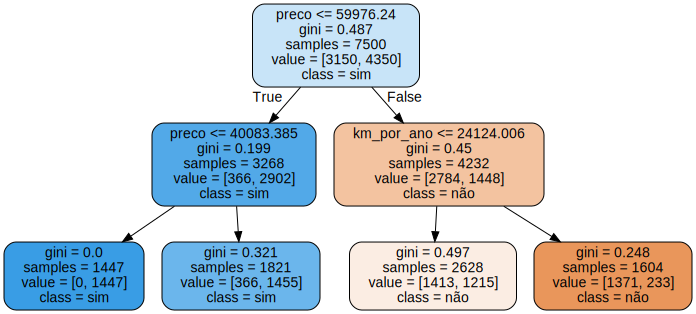

In [15]:
features = df_X.columns
dot_data = export_graphviz(modelo_svc, out_file=None, feature_names=features, filled=True, rounded=True, class_names=["não", "sim"])
grafico = graphviz.Source(dot_data)

grafico